## Importing required Files

In [13]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
training_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=True, rotation_range=30, height_shift_range=0.2, fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory("./Dataset/Training", target_size=(224,224), class_mode='categorical', batch_size = 64)

validation_generator = validation_datagen.flow_from_directory("./Dataset/Validation", target_size=(224,224), class_mode='categorical', batch_size= 16)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './Dataset/Training'

## CNN

In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 384)         2457984   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 384)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1536)             

## Fitting the Model with 10 epochs

In [ ]:
m = model.fit(train_generator, epochs = 10, validation_data = validation_generator)

Epoch 1/10
9/9 [==============================] - 71s 8s/step - loss: 0.6643 - acc: 0.6890 - val_loss: 0.6540 - val_acc: 0.7619
Epoch 2/10
9/9 [==============================] - 58s 6s/step - loss: 0.6572 - acc: 0.6724 - val_loss: 0.5271 - val_acc: 0.7619
Epoch 3/10
9/9 [==============================] - 60s 7s/step - loss: 0.6134 - acc: 0.6677 - val_loss: 0.4339 - val_acc: 0.7778
Epoch 4/10
9/9 [==============================] - 50s 6s/step - loss: 0.4984 - acc: 0.7290 - val_loss: 0.4647 - val_acc: 0.8254
Epoch 5/10
9/9 [==============================] - 47s 6s/step - loss: 0.4762 - acc: 0.7681 - val_loss: 0.3406 - val_acc: 0.8413
Epoch 6/10
9/9 [==============================] - 48s 5s/step - loss: 0.4174 - acc: 0.7995 - val_loss: 0.4843 - val_acc: 0.8333
Epoch 7/10
9/9 [==============================] - 47s 5s/step - loss: 0.4808 - acc: 0.7698 - val_loss: 0.3768 - val_acc: 0.8333
Epoch 8/10
9/9 [==============================] - 47s 5s/step - loss: 0.4252 - acc: 0.8154 - val_loss: 0

## Plotting loss and accuracy

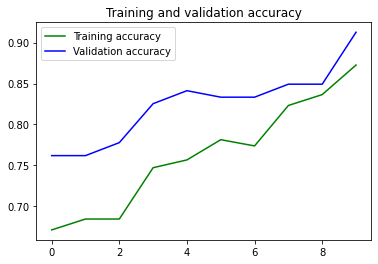

<Figure size 432x288 with 0 Axes>

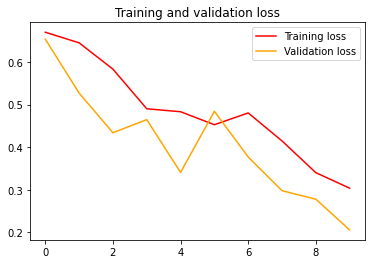

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = m.history['acc']
val_acc = m.history['val_acc']
loss = m.history['loss']
val_loss = m.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.tight_layout()
plt.show()

## Saving the Model

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved")

NameError: name 'model' is not defined